In [1]:
import os
import sys
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('Quantum_DNA_1.0')]+ 'Quantum_DNA_1.0'
if ROOT_DIR not in sys.path:
    del sys.path[0]
    sys.path.insert(0, ROOT_DIR)

In [2]:
from DNA.model import TB_Model, save_tb_params, load_tb_params, particle_tb_Hamiltonian, Hamiltonian, fourier_analysis_one_particle 
import numpy as np
from itertools import chain

In [3]:
# Latin Modern Sans
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
# create a custom tight-binding model describing relations between persons

tb_site_basis = ['P0', 'P1', 'P2', 'P3']
tb_config = [('relation', 'P0', 'P1'),
             ('relation', 'P0', 'P2'), 
             ('relation', 'P0', 'P3')]
num_strands = 1

tb_model = TB_Model(4, 'my_model', tb_site_basis=tb_site_basis, tb_config=tb_config, num_strands=num_strands)
tb_model.__str__()

"TB_Model(num_tb_sites=4, tb_model_name=my_model, tb_site_basis=['P0', 'P1', 'P2', 'P3'], tb_config=[('relation', 'P0', 'P1'), ('relation', 'P0', 'P2'), ('relation', 'P0', 'P3')], num_strands=1, num_sites_per_strand=4)"

In [4]:
# Define sites (persons) and a dictionary containing the parameters (relations between persons)

tb_sites = [['Alice'], ['Bob'], ['Charlie'], ['Eve']]
tb_basis_sites_dict = dict( zip( tb_model.tb_site_basis, list( chain(*tb_sites) ) ) )

tb_param_dict = {'relation_AliceBob': 5, 'relation_AliceCharlie': 3, 'relation_AliceEve': -2,
            'relation_BobAlice': 5, 'relation_CharlieAlice': 3, 'relation_EveAlice': -2}
info_dict={'author': 'Herb2024', 'subject': 'relations_between_persons'}
save_tb_params(tb_param_dict, info_dict, directory = 'stored_data/my_params', notes = 'The parameters describe relations between persons.')
tb_param_dict = load_tb_params(info_dict, directory = 'stored_data/my_params', load_metadata = False)

particle_tb_Hamiltonian(tb_model, tb_param_dict, tb_basis_sites_dict )

array([[ 0.,  5.,  3., -2.],
       [ 5.,  0.,  0.,  0.],
       [ 3.,  0.,  0.,  0.],
       [-2.,  0.,  0.,  0.]])

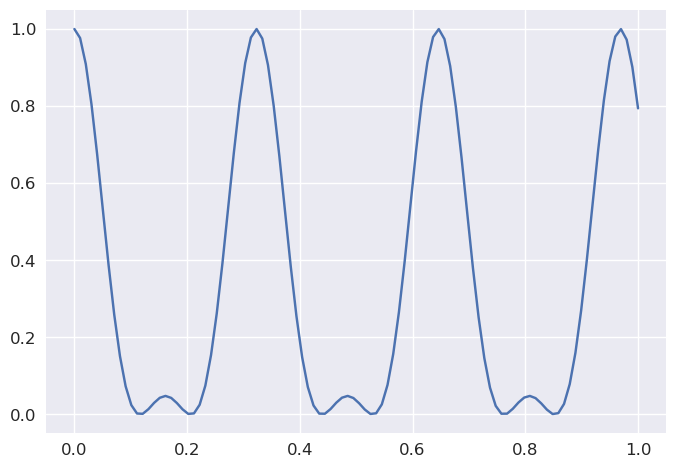

In [4]:
# Plot the unitary dynamics 

tb_model = TB_Model('WM', (1,3) )
hamiltonian = Hamiltonian('GCG', tb_model, Ham_kwargs={'relaxation':True, 'particle':'electron'})
average_pop, amplitudes, frequencies = fourier_analysis_one_particle(hamiltonian, '(0, 0)', '(0, 0)')

def time_evolution_population(t, average_pop, amplitudes, frequencies):
    return average_pop + np.sum( [amplitude * np.cos(frequency * t) for amplitude, frequency in zip(amplitudes, frequencies) ] )

t_list = np.linspace(0, 1, 100)
plt.plot(t_list, [time_evolution_population(t, average_pop, amplitudes, frequencies) for t in t_list] )
plt.show()